In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Setup A

Sample data is loaded to a `numpy` 2d-array. Then its SVD is calculated and singular values are plotted. 

In [9]:
countvectorizer = CountVectorizer(stop_words='english')
countvectors = countvectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
countvectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape
U, s, Vh = linalg.svd(countvectors, full_matrices=False)
print(U.shape, s.shape, Vh.shape)
plt.plot(s, color='red');


## Question 1
Create a matrix of the same size whose entries are uniformly distributed between 0 and 1 (you can use `np.random.uniform` to create such a matrix). Calculate its SVD. Plot its singular values. Compare the singular values with the singular values by making a graph (make original singular values `red` and singular values for uniformly distributed matrix `blue`.)

## Question 2
Randomly permute the contents of the matrix `vectors`. Calculate its SVD. Compare these singular values with earlier singular values by making a graph (make original singular values `red`, singular values for uniformly distributed matrix `blue` and singular values for randomly permuted matrix by `green`.)

## Question 3
In the comparison graph make the vertical axis, make the vertical axis logarithmic.

## Setup B


In [72]:
from PIL import Image
im = Image.open("Humphrey-Bogart.jpg")

In [74]:
im

In [77]:
# Convert the image to numpy array
arr = np.asarray(im)
print(arr.shape)
# The original image althought it is black and white, it is represented as an RGB image.
# The array `arr` is 3-dimensional.
# Convert it to be black and white. Array `a` is 2-dimensional
a = np.mean(arr, axis=2)
print(a.shape)

In [86]:
U, s, Vh = linalg.svd(a, full_matrices=False)

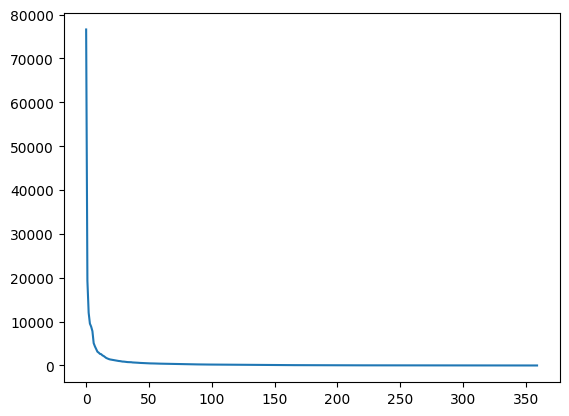

In [87]:
plt.plot(s);

## Question 4
Why does this graph of singular values resemble the graph of singular values in Question 1?

In [91]:
# Convert `a` to an PIL Image to display as an image.
im2 = Image.fromarray(np.uint8(a))
im2

## Question 5
Reconstruct an image using first 25 singular values using the matrices `U`, `s` and `Vh`.

What are some differences between the original image and the new reconstructed image?

## Question 6
Reconstruct an image using singular values after the first 25 using the matrices `U`, `s` and `Vh`.

What are some differences between the original image and the new reconstructed image?

If you combine the images in Question 5 and Question 6, do you get the original image back?

In [118]:
## Setup C
We add some noise to the original image.

In [121]:
noisy_a = a + np.random.normal(scale=10, size=a.shape)
noisy_im = Image.fromarray(np.uint8(noisy_a))
noisy_im

## Question 7

Calculate the SVD for the noisy image `noisy_im`. Reconstruct and approximation using the first `k` singular vector. What is the effect of changing `k`? What is the effect of this operation?

## Setup D
Write functions to solve the following problems using gradient descent with PyTorch.

In [7]:
## Setup D



## Question 1
Write a function `solve_linear(A, b)` which solves the equation $Ax=b$ and returns the result $x$ by minimizing the distance between $Ax$ and $b$.


In [32]:
# Fatma Erem Aksoy - 2315075

import torch

# Question 1:

def solve_linear(A, b):
    A = torch.tensor(A, dtype=torch.float32)
    b = torch.tensor(b, dtype=torch.float32)
    
    #creating a zero vector x for the solution
    x = torch.zeros(A.shape[1], 1, dtype=torch.float32)
    
    r = 0.02    # learning rate
    repeats = 1000   #how many times the iteration will take a place while performing gradient descent
    for _ in range(repeats):
        Ax = torch.matmul(A, x)   #computing the predicted Ax value
        difference = Ax - b 
        gradient = torch.matmul(torch.transpose(A, 0, 1), difference)
        x -= r * gradient
        
    return x   #returning the resulting x values

#sample matrices for A and b
A = [[5, 2],
     [4, 1],
     [2, 3]]
b = [[5],
     [7],
     [3]]

answer = solve_linear(A, b)
print(answer)


tensor([[ 1.3304],
        [-0.0435]])


## Question 2
Write a function `find_orthogonal(n)` which returns an $n\times n$ orthogonal matrix `Q`, starting from a random matrix $Q$ uses gradient descent to minimize the distance between the product $Q^TQ$ and the idenitity $I$.

In [59]:
# Question 2:

def find_orthogonal(n):
    Q = torch.randn(n, n, dtype=torch.float32, requires_grad=True)
    r = 0.02    #learning rate 
    repeats = 2000   #number of iterations
    
    #performing gradient descent
    for _ in range(repeats):
        Q_trans = torch.transpose(Q, 0, 1)   #computing Q transpose
        Q_product = torch.matmul(Q_trans, Q)   #computing the product using the matrix multiplication func
        
        difference = Q_product - torch.eye(n)
        loss = torch.norm(difference, p='fro')   #computing the loss func using the Frobenius norm of the difference
        loss.backward()    #computing the gradient using backward pass
        
        with torch.no_grad():   #updating Q matrix using gradientg descent
            Q -= r * Q.grad
            Q.grad.zero_()   #changing the gradient value to 0 after updating them
        
    return Q.detach().numpy()   #returning an nxn orthogonal matrix Q


n = 5   #sample n value to compute the nxn orthogonal matrix Q
ort_matrix = find_orthogonal(n)
print(ort_matrix)
            

[[-0.21823682  0.13351569 -0.9280936   0.2548414   0.09069644]
 [ 0.11295806  0.32610205  0.05571104 -0.19718398  0.91591334]
 [-0.10451468 -0.2217181  -0.27029583 -0.92561936 -0.09090035]
 [-0.8884403   0.38148874  0.2429316  -0.05697877 -0.0533091 ]
 [-0.37220597 -0.82357216  0.05568548  0.18260032  0.37486437]]


## Question 3
Write a function `decompose_lu(A)` which returns the matrices `L`, `U` for the $LU$ decomposition of matrix `A` using gradient descent.

In [88]:
#  Question 3:

def decompose_lu(A):
    r = 0.02    #learning rate 
    repeats = 2000   #number of iterations
    A = torch.tensor(A, dtype=torch.float32, requires_grad=True)  #converting the input matrix A to a PyTorh tensor
    n = A.shape[0]   #computing the size of the matrix
    
    #matrices L and U intialization
    L = torch.eye(n, dtype=torch.float32, requires_grad=True)
    U = torch.zeros_like(A, requires_grad=True)
    
    #performing gradient descent
    for _ in range(repeats):
        #computing the LU product
        LU = torch.matmul(L, U)

        #computing the difference between LU product and A
        difference = A - LU

        #computing the loss func using the Frobenius norm of the difference
        loss = torch.norm(difference, p='fro')
        
        #computing the gradients using backward pass
        loss.backward()   

        #updating L and U using gradient descent
        with torch.no_grad():
            L -= r * L.grad
            U -= r * U.grad
            
            #changing the gradient values to 0 after updating them
            L.grad.zero_()
            U.grad.zero_()

    return L.detach().numpy(), U.detach().numpy()    #returning the matrices L and U

#sample matrix
A = [[1, 4, 4],
     [8, 7, 2],
     [5, 3, 0]]

L, U = decompose_lu(A)

print("L matrix:")
print(L)
print("\nU matrix:")
print(U)




L matrix:
[[ 2.2416642   0.56976366 -0.07309666]
 [ 0.5696865   2.8418396   1.000339  ]
 [-0.07276987  1.0006394   1.6913682 ]]

U matrix:
[[-0.09866729  1.2854415   1.6604992 ]
 [ 2.205325    1.9144727   0.41615757]
 [ 1.5855894   0.6394442  -0.1949325 ]]


## Question 4
Write a function `decompose_qr(A)` which returns the matrices `Q`, `R` for the $QR$ decomposition of the matrix `A` using gradient descent.


In [136]:
# Question 4:

def decompose_qr(A):
    #converting input matrix A to a PyTorch tensor
    A = torch.tensor(A, dtype=torch.float32, requires_grad=True)

    row, column = A.shape     #finding the dimensions of matrix A

    #initializying matrices Q and R
    Q = torch.randn((row, column), dtype=torch.float32)  
    R = torch.zeros((column, column), dtype=torch.float32)
    
    r = 0.01   #learning rate
    repeats = 1500

    for _ in range(repeats):
        Q = Q/torch.norm(Q, dim=0)  #normalyzing the columns of matrix Q
        R = torch.matmul(Q.T, A)  #updating matrix R using Gram-Schmidt

        Q_grad = A - torch.matmul(Q, R)
        with torch.no_grad():   #updating matrix Q using gradient descent
            Q += r*torch.matmul(Q_grad, R.T)

    return Q.detach().numpy(), R.detach().numpy()   #returning the matrices Q and R

# Example usage
A = [[4, 1],
     [3, 2]]

Q, R = decompose_qr(A)
print("Q:")
print(Q)
print("\nR:")
print(R)


Q:
[[ 0.80557626 -0.59249204]
 [ 0.5924921   0.80557626]]

R:
[[4.9997816  1.9905605 ]
 [0.04676056 1.0186605 ]]


## Question 5
Write a function `decompose_svd(A)` which returns the matrices `U`, `s`, `V` for the $SVD$ decomposition of the matrix $A$ using gradient descent.

In [140]:
# Question 5:

def decompose_svd(A):
    A = torch.tensor(A, dtype=torch.float32)  #converting input matrix A to a PyTorch tensor
    row, column = A.shape   #getting the dimensions of matrix A
    
    #initializying random matrices u and V
    U = torch.randn(row, row, dtype=torch.float32)
    V = torch.randn(column, column, dtype=torch.float32)
    
    r = 0.01
    repeats = 2000
    for _ in range(repeats):   #using Power method 
        U_grad = 2 * (torch.matmul(torch.matmul(U, V.t()), A) - A)
        V_grad = 2 * (torch.matmul(U.t(), torch.matmul(V, A.t())) - A.t())
        
        #updating both U and V using gradient descent
        U -= r*U_grad
        V -= r*V_grad
    
    s = torch.matmul(torch.matmul(U.t(), A), V)  #computing s value (singular value)
   
    return U.detach().numpy(), s.detach().numpy(), V.detach().numpy()

A = [[4, 2, 3],
     [2, 1, 5],
     [1, 7, 6]]


U, s, V = decompose_svd(A)
print("U:")
print(U)
print("\ns:")
print(s)
print("\nV:")
print(V)
    


U:
[[ 3.1828132  1.7233062  2.4444206]
 [ 4.0178013  3.340125   4.6053586]
 [-6.728999  -4.379221  -6.153703 ]]

s:
[[  -7.3344116 -832.0092     601.8579   ]
 [   1.6869373 -405.42444    287.38852  ]
 [   1.0871353 -595.64124    423.7614   ]]

V:
[[  4.0579743  65.82241   -51.27922  ]
 [  1.0500127  32.963943  -24.606678 ]
 [  2.3977597  50.81643   -38.9475   ]]
